# Training Models

In [19]:
# Numerical Management
import numpy as np
# Data Management
import pandas as pd
# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# System
import os
import sys
assert sys.version_info >= (3, 5)
# M.L
import sklearn
assert sklearn.__version__ >= "0.20"
np.random.seed(42)

### The Normal Equation

In [20]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [21]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [23]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

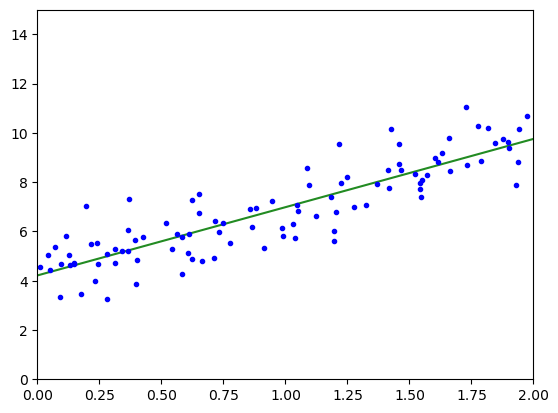

In [33]:
plt.plot(X_new, y_predict, "forestgreen")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [35]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [37]:
# Moorse-Penrose Inverse
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [40]:
# Singular Value Decomposition
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### Batch Gradient Descent

In [41]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [42]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [46]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [44]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [47]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [48]:
theta

array([[4.21076011],
       [2.74856079]])

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### Mini-batch Gradient Descent 